<a href="https://colab.research.google.com/github/comaraDOTcom/ml-applications/blob/main/Week-5/ET5003_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-17' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "3" #@param {type:"string"}
Student_ID_Name = "Conor O'Mara 20151845" #@param {type:"string"}
Student_ID_Name = "Morgan Lynch" #@param {type:"string"}
Student_ID_Name = "Aziz Aoudjit" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"]
Submission = True #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from datetime import datetime

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [9]:
!pip install gpy

In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az
import seaborn as sns

In [11]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100
sns.set_theme(context='notebook', style='ticks', palette='Accent', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

### Google drive file paths and IO

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# path to files
path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity3/house-data/'

In [14]:
# data
train_data = 'HousePrice_Train.csv'
test_data = 'HousePrice_Test.csv'

In [15]:
df_train = pd.read_csv(path+train_data)
df_kaggle_test = pd.read_csv(path+test_data)

In [16]:
df_train.head(5)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


### Data preparation

In [17]:
def show_nulls(df: pd.DataFrame):
  """
  This function takes a dataframe and returns the number of nulls in each column and the percentage of 
  nulls in a column too.
  """
  nulls = pd.DataFrame(df.isna().sum())
  nulls.rename(columns = {0:'Number of Nulls'}, inplace = True) 
  nulls['% of Nulls'] = nulls['Number of Nulls']/df.shape[0]*100
  cols_with_nulls = nulls[nulls['Number of Nulls'] > 0].T.columns.tolist()
  return nulls

In [18]:
show_nulls(df_train)

,Number of Nulls,% of Nulls
Index,0,0.000000
ID,0,0.000000
Location,0,0.000000
Num_Bathrooms,0,0.000000
Num_Beds,0,0.000000
BER_class,251,15.323565
Description,0,0.000000
Services,1061,64.774115
Features,0,0.000000
Latitude,0,0.000000


In [19]:
# decide to drop all categorical variables and work with numerical
features = ['ID', 'Num_Bathrooms', 'Num_Beds', 'Latitude', 'Longitude', 'Surface', 'Price']

In [20]:
df_train_subset = df_train[features]

In [21]:
# Look at null % in the training dataframe.
show_nulls(df_train_subset)

,Number of Nulls,% of Nulls
ID,0,0.0
Num_Bathrooms,0,0.0
Num_Beds,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Surface,0,0.0
Price,0,0.0


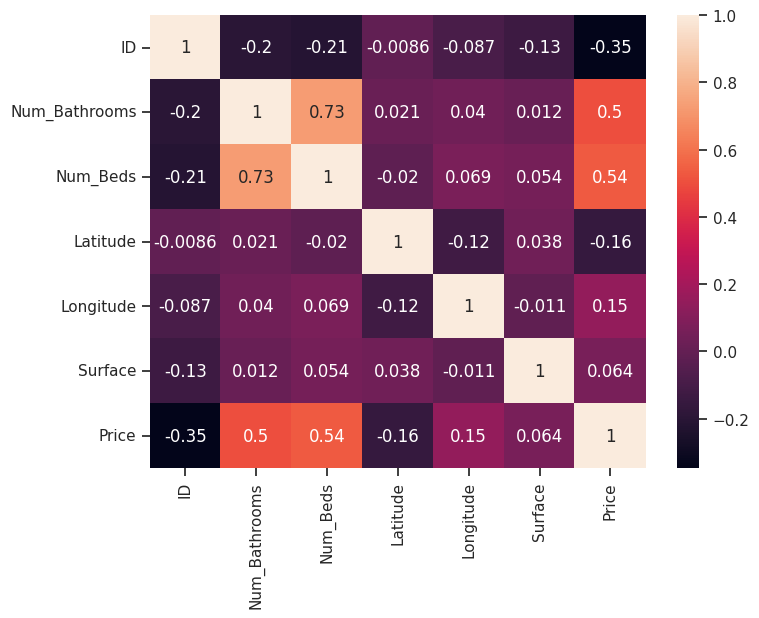

In [22]:
# check the correlcation matrix. It seems bathrooms and beds correlate highly with price.
sns.heatmap(df_train_subset[features].corr(), annot = True)
plt.show()

In [23]:
def plot_distribtion(df, feature):
    """
    Function plots the histogram and boxplot distribution of the feature side by side.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{feature}')
    sns.histplot(ax=ax1, data=df, x=feature, kde=True)
    sns.boxplot(ax=ax2,data=df,  y=feature, palette="Set2")
    plt.show()

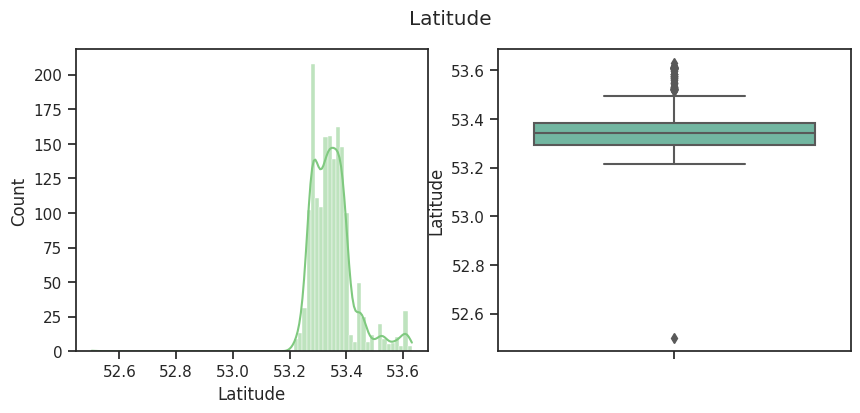

In [24]:
# lots of outliers exist in the longitudinal data
plot_distribtion(df_train_subset, 'Latitude')

In [25]:
# removing the outliers from the boxplot (outside of the whiskers)
from matplotlib.cbook import boxplot_stats

outliers = [y for stat in boxplot_stats(df_train_subset['Latitude']) for y in stat['fliers']]

In [26]:
#drop rows that contain any value outliers
df_train_subset = df_train_subset[df_train_subset.Latitude.isin(outliers) == False]

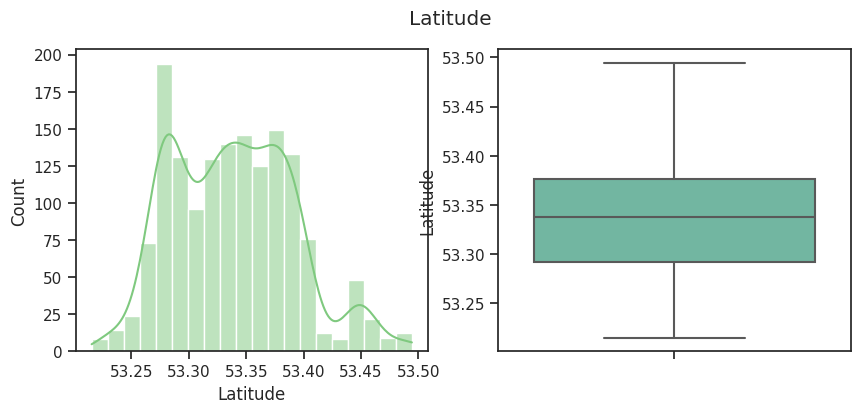

In [27]:
# plot again without outliers (distirbution is easier to plot)
plot_distribtion(df_train_subset, 'Latitude')

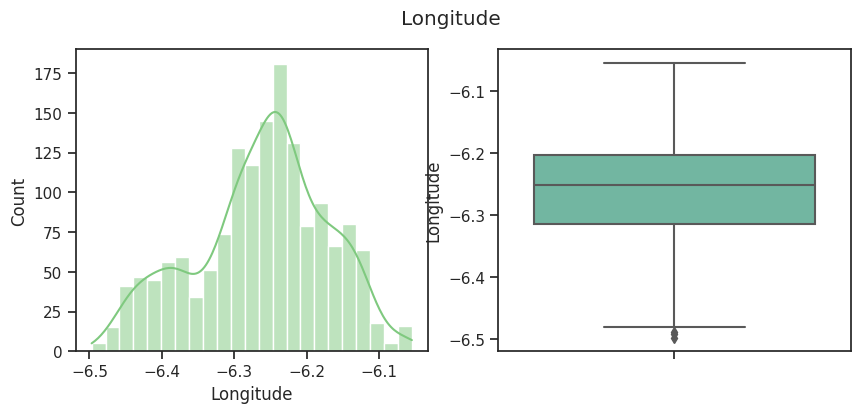

In [28]:
# longitude also looks fine.
plot_distribtion(df_train_subset, 'Longitude')

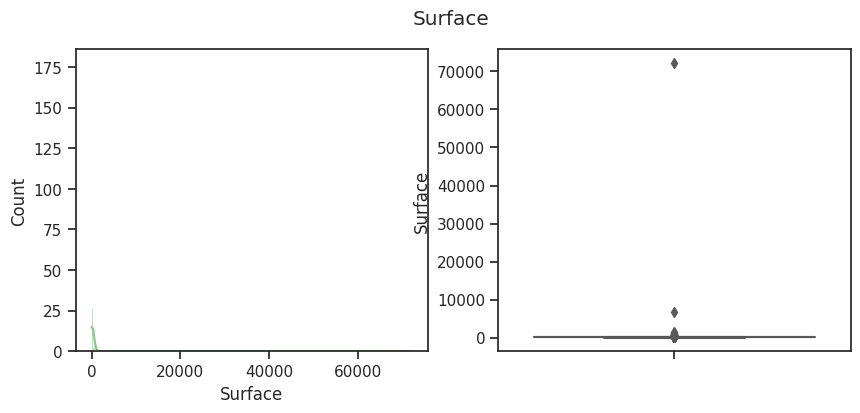

In [29]:
# longitude also looks fine.
plot_distribtion(df_train_subset, 'Surface')

In [30]:
outliers = [y for stat in boxplot_stats(df_train_subset['Surface']) for y in stat['fliers']]
df_train_subset = df_train_subset[df_train_subset.Surface.isin(outliers) == False]

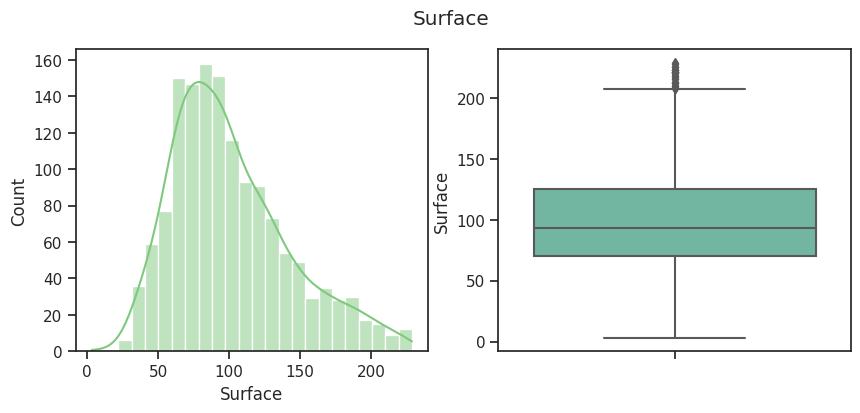

In [31]:
plot_distribtion(df_train_subset, 'Surface')

In [32]:
del features[-1]
df_kaggle_test = df_kaggle_test[features]
df_kaggle_test.head()

,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
0,12292473,2,2,53.316269,-6.243391,65.0
1,12314667,2,5,53.390769,-6.281936,142.0
2,11699240,1,2,53.272486,-6.108675,80.0
3,12416984,4,4,53.376932,-6.185334,209.0
4,12383407,2,3,53.327208,-6.308938,108.0


In [33]:
# double check no nulls in test set
show_nulls(df_kaggle_test)

,Number of Nulls,% of Nulls
ID,0,0.0
Num_Bathrooms,0,0.0
Num_Beds,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Surface,0,0.0


### Prep data for modelling

In [34]:
Xs_train = df_train_subset.iloc[:,1:-1].values 
# train set, output column, cost
ys_train = df_train_subset.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
X_kaggle_test = df_kaggle_test.iloc[:,1:].values 
# test set, output column, cost

# StandardScaler() will normalize the features (we need a normal distribution for regression) i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1


In [35]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_val,y_train,y_val = train_test_split(Xs_train, ys_train, test_size=0.3)

In [36]:
sc = StandardScaler()

Xss_train = np.hstack([X_train,(X_train[:,[2]]*X_train[:,[3]])])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_val = np.hstack([X_val,(X_val[:,[2]]*X_val[:,[3]])])
Xn_val = xscaler.transform(Xss_val)

Xss_kaggle_test = np.hstack([X_kaggle_test,(X_kaggle_test[:,[2]]*X_kaggle_test[:,[3]])])
Xn_kaggle_test = xscaler.transform(Xss_kaggle_test)

# log transform the target
ylog = np.log(y_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

yn_val = y_val

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [37]:
# your code here

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

## Normal regression

In [38]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 902.32


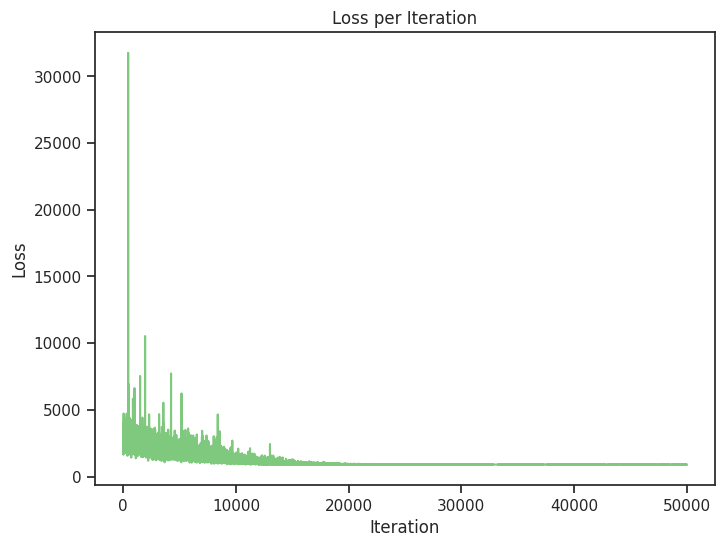

In [39]:

#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [40]:
# samples from the posterior
posterior = approximation.sample(5000)

In [149]:

# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - yn_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - yn_val) / yn_val)))

MAE =  220932.50794671342
MAPE =  0.5743406714444766


In [152]:
#Predict the house prices on our final test data

# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_kaggle_test.T)
y_pred_test = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [160]:
#We create an output file of the predicted house prices for the test dataset along with their index
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_test})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df.to_csv(f"House Price Prediction_Bayesian_FullModel_{date}.csv", index=False)

In [162]:
df_kaggle_test

,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
0,12292473,2,2,53.316269,-6.243391,65.0
1,12314667,2,5,53.390769,-6.281936,142.0
2,11699240,1,2,53.272486,-6.108675,80.0
3,12416984,4,4,53.376932,-6.185334,209.0
4,12383407,2,3,53.327208,-6.308938,108.0
...,...,...,...,...,...,...
697,12392566,1,1,53.343377,-6.296654,40.0
698,12352487,1,2,53.351074,-6.285557,57.0
699,12387290,1,3,53.261710,-6.164979,93.0
700,12382807,2,3,53.360515,-6.189661,118.0


In [ ]:
#We create an output file of the predicted house prices for the test dataset along with their index
df_kaggle_full_regression = pd.DataFrame({"Index" :  df_kaggle_test.index.values , "Price" : y_pred_test})
df_kaggle_full_regression['Index'] = df_kaggle_full_regression['Index'].astype(int)
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df_kaggle_full_regression.to_csv(path + 'BayesianRegressionPredictions/' +  f"House Price Prediction_Bayesian_FullModel_{date}.csv", index=False)

In [156]:
df_kaggle_full_regression

,Index,Price
0,0,3.273623e+05
1,1,5.265594e+05
2,2,4.859185e+05
3,3,1.003591e+06
4,4,4.057079e+05
...,...,...
697,697,2.348328e+05
698,698,2.749797e+05
699,699,5.052734e+05
700,700,5.110502e+05


### KMeans clustering

In [49]:
# use k-means clustering to calculate the sum of the squared distances for k clusters
from sklearn import cluster

inertia = []
for k in range(1,15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    inertia.append(clustered_data_sklearn.inertia_)

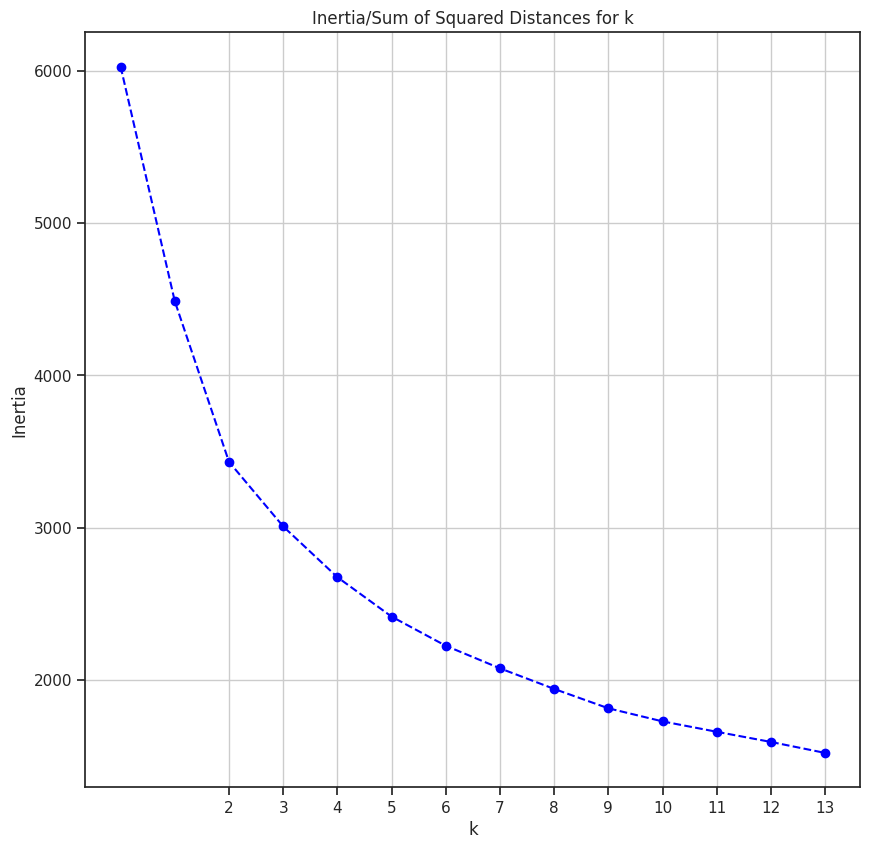

In [50]:
# plot to see if there is a clear elbow
plt.figure(figsize=(10,10))
plt.title('Inertia/Sum of Squared Distances for k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 30))
plt.grid()
plt.plot(inertia, linestyle='--', marker='o', color='b')
plt.show()

### Silhouette metric

In [51]:
from sklearn import metrics

silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = metrics.silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

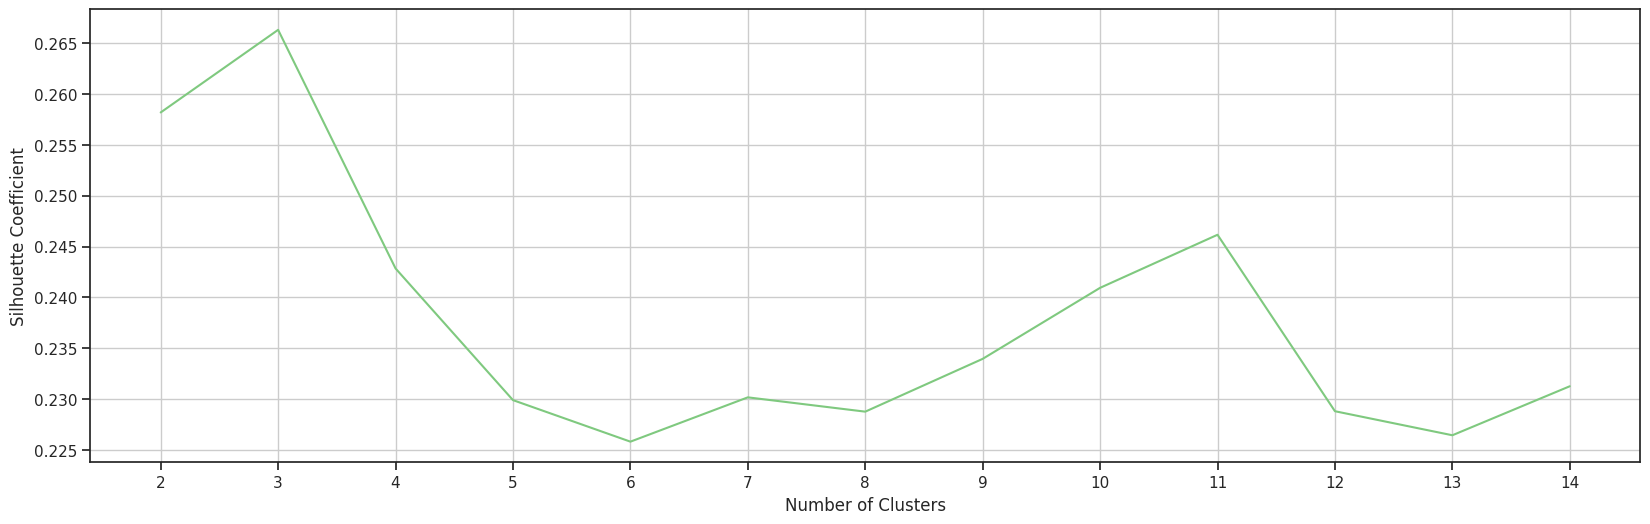

In [52]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

It appears 7 clusters best represent the data from this plot.

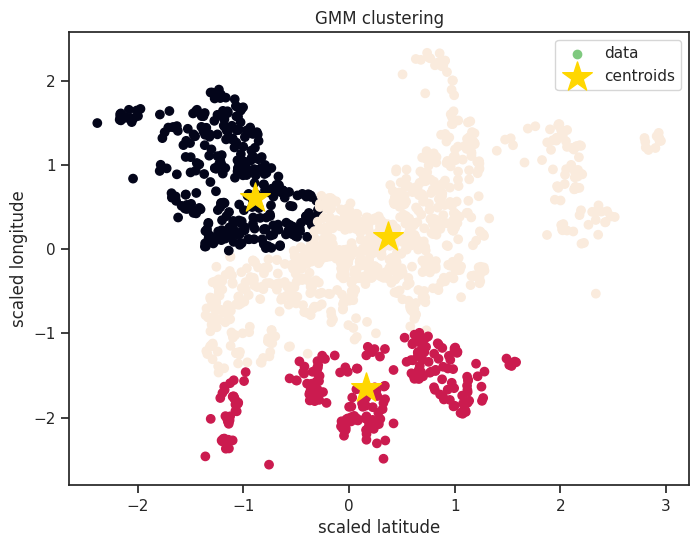

In [99]:
# training gaussian mixture model 
gmm = GaussianMixture(n_components=3)
# clustering by features 2, 3(lat-long)
ind=[2,3]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
labels = gmm.predict(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1], c = labels, label='data')
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], c='gold', marker='*', s=500, label='centroids')
plt.title('GMM clustering')
plt.ylabel('scaled longitude')
plt.xlabel('scaled latitude')
plt.legend()
plt.show()

In [100]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 227, 1: 165, 2: 613}

In [101]:
# test clusters
clusters_val = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_val, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 94, 1: 67, 2: 271}

In [102]:
# create the training and target dataset for cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xvaln0 = Xn_val[clusters_val==0,:]

ylog0 = np.log(yn_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [103]:
# create the training and target dataset for cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xvaln1 = Xn_val[clusters_val==1,:]
ylog1 = np.log(yn_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [104]:
# create the training and target dataset for cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xvaln2 = Xn_val[clusters_val==2,:]
ylog2 = np.log(yn_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [106]:
# look at the different scales of each cluster
print(yscaler0.scale_)
print(yscaler1.scale_)
print(yscaler2.scale_)

[0.82306851]
[1.0019108]
[0.97343641]


In [148]:
X_val

array([[  2.        ,   5.        ,  53.298761  ,  -6.264403  ,
        128.02      ],
       [  3.        ,   3.        ,  53.44984298,  -6.1750463 ,
        125.        ],
       [  1.        ,   2.        ,  53.364955  ,  -6.293292  ,
         71.        ],
       ...,
       [  1.        ,   3.        ,  53.404472  ,  -6.178982  ,
         96.        ],
       [  2.        ,   4.        ,  53.291036  ,  -6.13488   ,
        136.01      ],
       [  2.        ,   4.        ,  53.28548598,  -6.17564342,
        165.        ]])

In [107]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 218.73


In [108]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])

with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 97.524


In [109]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 2d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])

with model_2:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 378.98


### Simulations

In [110]:
# Simulations
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

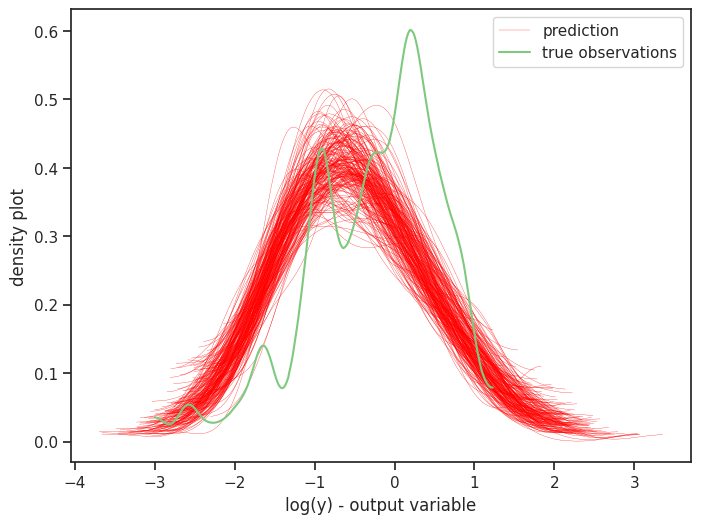

In [111]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

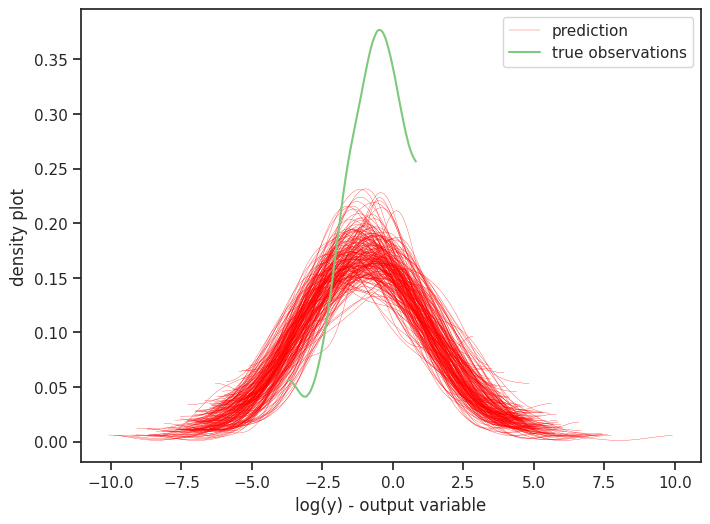

In [112]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

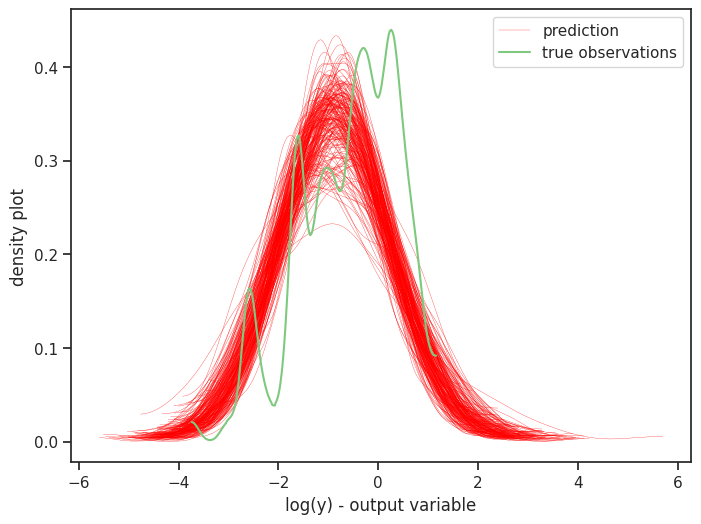

In [113]:
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior1['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

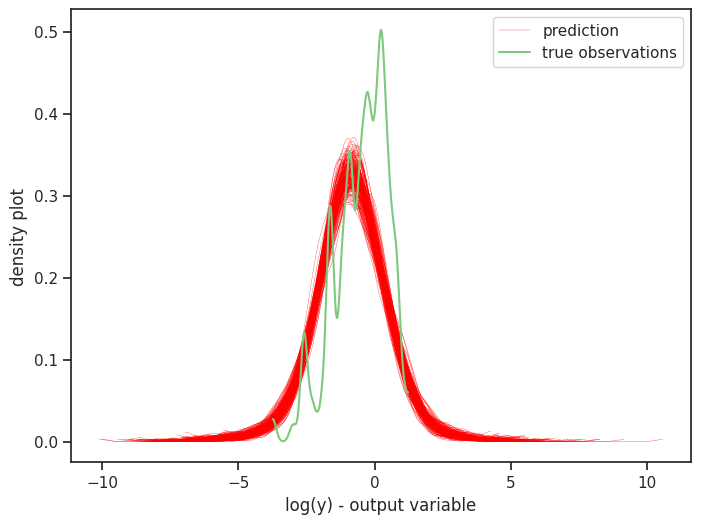

In [118]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Evaluate performance on Validation dataset

In [122]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xvaln0.T)))
print("Size Cluster0", np.sum(clusters_val==0), ", \nMAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - yn_val[clusters_val==0]))), print("MAPE = ",(np.mean(abs(y_pred_BLR0 - yn_val[clusters_val==0]) /yn_val[clusters_val==0]))))

# # cluster 1
# y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
#               + np.dot(np.mean(posterior1['beta'],axis=0), Xvaln1.T)))
# print("Size Cluster1", np.sum(clusters_val==1), ", MAE Cluster1=",
#       (np.mean(abs(y_pred_BLR1 - y_val[clusters_val==1]))))

# # cluster 2
# y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
#               + np.dot(np.mean(posterior2['beta'],axis=0), Xvaln2.T)))
# print("Size Cluster2", np.sum(clusters_val==2), ", MAE Cluster2=",
#       (np.mean(abs(y_pred_BLR2 - y_val[clusters_val==2]))))



# # joint
# joint=np.hstack([abs(y_pred_BLR0 - y_val[clusters_val==0]),
#                  abs(y_pred_BLR1 - y_val[clusters_val==1]),
#                  abs(y_pred_BLR2 - y_val[clusters_val==2])])

# joint_mape =np.hstack([abs(y_pred_BLR0 - y_val[clusters_val==0]) / y_val[clusters_val==0],
#                  abs(y_pred_BLR1 - y_val[clusters_val==1]) / y_val[clusters_val==1],
#                  abs(y_pred_BLR2 - y_val[clusters_val==2]) / y_val[clusters_val==2]])

# # MAE
# print("MAE=",np.mean(joint))
# print("MAPE=",np.median(joint_mape))

MAPE =  0.9999983725875451
Size Cluster0 94 , 
MAE Cluster0= 619593.2804013499 None


In [147]:
np.exp(yscaler0.inverse_transform((np.mean(posterior0['alpha']) + np.dot(np.mean(posterior0['beta'],axis=0), Xvaln0.T)).reshape(-1,1)))

array([[0.80800507],
       [0.26972424],
       [0.89360768],
       [0.70751078],
       [1.04777804],
       [0.40274933],
       [1.41950998],
       [0.33675917],
       [2.5685041 ],
       [0.46920286],
       [2.29040124],
       [0.5672438 ],
       [0.24140037],
       [0.51088177],
       [0.27352672],
       [0.35504543],
       [0.59936749],
       [0.3551311 ],
       [0.74175198],
       [0.20344654],
       [2.69496088],
       [0.31972169],
       [0.37155704],
       [0.67447884],
       [1.06268478],
       [0.37512633],
       [0.41091595],
       [1.31919997],
       [0.86657608],
       [1.56378598],
       [0.37858967],
       [3.73913616],
       [0.43221777],
       [0.50767977],
       [0.21408314],
       [0.41518855],
       [0.4455243 ],
       [1.03458602],
       [1.00139306],
       [0.61775564],
       [0.44747949],
       [0.44633842],
       [2.2625023 ],
       [0.74752242],
       [0.35059274],
       [0.26718024],
       [0.99524185],
       [0.529

In [138]:
np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) + np.dot(np.mean(posterior0['beta'],axis=0), Xvaln0.T)))

array([0.80800507, 0.26972424, 0.89360768, 0.70751078, 1.04777804,
       0.40274933, 1.41950998, 0.33675917, 2.5685041 , 0.46920286,
       2.29040124, 0.5672438 , 0.24140037, 0.51088177, 0.27352672,
       0.35504543, 0.59936749, 0.3551311 , 0.74175198, 0.20344654,
       2.69496088, 0.31972169, 0.37155704, 0.67447884, 1.06268478,
       0.37512633, 0.41091595, 1.31919997, 0.86657608, 1.56378598,
       0.37858967, 3.73913616, 0.43221777, 0.50767977, 0.21408314,
       0.41518855, 0.4455243 , 1.03458602, 1.00139306, 0.61775564,
       0.44747949, 0.44633842, 2.2625023 , 0.74752242, 0.35059274,
       0.26718024, 0.99524185, 0.52998618, 1.75723843, 0.34356291,
       1.43871479, 0.66062894, 0.35363876, 1.36560236, 0.60078766,
       1.34287309, 1.97710474, 0.30878456, 1.03838019, 2.8724443 ,
       0.33308919, 0.19094714, 2.3339173 , 0.49207072, 0.68127331,
       0.76366093, 0.33479292, 0.64595654, 0.4634438 , 0.65800307,
       3.49775263, 0.23238892, 0.27813523, 1.61103423, 1.27204

In [133]:
np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xvaln0.T))).reshape(-1,1) - yn_val[clusters_val == 0]

array([[ -774999.19199493],
       [ -314999.73027576],
       [ -984999.10639232],
       [ -544999.29248922],
       [ -594998.95222196],
       [ -494999.59725067],
       [ -774998.58049002],
       [ -498999.66324083],
       [-1294997.4314959 ],
       [ -449999.53079714],
       [-1194997.70959876],
       [ -794999.4327562 ],
       [ -394999.75859963],
       [ -519999.48911823],
       [ -339999.72647328],
       [ -499999.64495457],
       [ -549999.40063251],
       [ -319949.6448689 ],
       [ -549999.25824802],
       [ -294999.79655346],
       [-1149997.30503912],
       [ -349999.68027831],
       [ -394999.62844296],
       [ -624999.32552116],
       [ -749998.93731522],
       [ -459999.62487367],
       [ -494999.58908405],
       [-1049998.68080003],
       [ -794999.13342392],
       [ -874998.43621402],
       [ -374999.62141033],
       [ -994996.26086384],
       [ -394999.56778223],
       [ -544999.49232023],
       [ -329999.78591686],
       [ -414999.584

In [90]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xtestn5,  nsamples=200)
Ypred6 = ppc(posterior6['alpha'],posterior6['beta'],posterior6['sigma_n'],Xtestn6,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 yscaler6.inverse_transform(Ypred6)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3, ylog4, ylog5, ylog6])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

NameError: ignored

### Predict using the Piecewise model on the Kaggle test data

In [ ]:
#Add the index column back onto Test data
Xn_test_with_index = np.hstack((df_test_subset.index[:, None],Xn_kaggle_test))
# increment indexes now that the index has been added as the first dimension
ind_after_index_added = [x+1 for x in ind]

clusters_final_test = gmm.predict(Xn_test_with_index[:,ind_after_index_added])
unique_kaggle_test, counts_kaggle_test = np.unique(clusters_final_test, return_counts=True)
dict(zip(unique_kaggle_test, counts_kaggle_test))

In [ ]:
Xtestn0_final = Xn_test_with_index[clusters_final_test==0,:]
Xtestn1_final = Xn_test_with_index[clusters_final_test==1,:]
Xtestn2_final = Xn_test_with_index[clusters_final_test==2,:]
Xtestn3_final = Xn_test_with_index[clusters_final_test==3,:]
Xtestn4_final = Xn_test_with_index[clusters_final_test==4,:]
Xtestn5_final = Xn_test_with_index[clusters_final_test==5,:]
Xtestn6_final = Xn_test_with_index[clusters_final_test==6,:]

#Store the indexes for cluster
idx_cluster0 = Xtestn0_final[:,0]
idx_cluster1 = Xtestn1_final[:,0]
idx_cluster2 = Xtestn2_final[:,0]
idx_cluster3 = Xtestn3_final[:,0]
idx_cluster4 = Xtestn4_final[:,0]
idx_cluster5 = Xtestn5_final[:,0]
idx_cluster6 = Xtestn6_final[:,0]

#Remove the index from the cluster again for prediction
Xtestn0_final = Xtestn0_final[:,1:]
Xtestn1_final = Xtestn1_final[:,1:]
Xtestn2_final = Xtestn2_final[:,1:]
Xtestn3_final = Xtestn3_final[:,1:]
Xtestn4_final = Xtestn4_final[:,1:]
Xtestn5_final = Xtestn5_final[:,1:]
Xtestn6_final = Xtestn6_final[:,1:]


# cluster 0
y_pred_kaggle_test0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0_final.T)))

# cluster 1
y_pred_kaggle_test1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1_final.T)))

# cluster 2
y_pred_kaggle_test2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2_final.T)))

# cluster 3
y_pred_kaggle_test3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3_final.T)))

# cluster 4
y_pred_kaggle_test4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4_final.T)))

# cluster 5
y_pred_kaggle_test5 = np.exp(yscaler5.inverse_transform(np.mean(posterior5['alpha']) 
              + np.dot(np.mean(posterior5['beta'],axis=0), Xtestn5_final.T)))

y_pred_kaggle_test6 = np.exp(yscaler6.inverse_transform(np.mean(posterior6['alpha']) 
              + np.dot(np.mean(posterior6['beta'],axis=0), Xtestn6_final.T)))

In [ ]:
pred_0 = np.hstack((idx_cluster0[:, None], yscaler0.inverse_transform(y_pred_kaggle_test0[:, None])))
pred_1 = np.hstack((idx_cluster1[:, None], yscaler1.inverse_transform(y_pred_kaggle_test1[:, None])))
pred_2 = np.hstack((idx_cluster2[:, None], yscaler2.inverse_transform(y_pred_kaggle_test2[:, None])))
pred_3 = np.hstack((idx_cluster3[:, None], yscaler3.inverse_transform(y_pred_kaggle_test3[:, None])))
pred_4 = np.hstack((idx_cluster4[:, None], yscaler4.inverse_transform(y_pred_kaggle_test4[:, None])))
pred_5 = np.hstack((idx_cluster5[:, None], yscaler5.inverse_transform(y_pred_kaggle_test5[:, None])))
pred_6 = np.hstack((idx_cluster6[:, None], yscaler6.inverse_transform(y_pred_kaggle_test6[:, None])))

#Combine all predicted results together
final_prediction_piecewise = np.vstack((pred_0, pred_1, pred_2, pred_3, pred_4, pred_5, pred_6))

In [ ]:
#Sort the final predictions on index again, just to have final index in order
final_prediction_piecewise = final_prediction_piecewise[final_prediction_piecewise[:, 0].argsort()]

In [ ]:
from datetime import datetime

#We create an output file of the predicted house prices for the test dataset along with their index
df_piecewise_kaggle_submission = pd.DataFrame({"Index" :  final_prediction_piecewise[:,0] , "Price" : final_prediction_piecewise[:,1]})
df_piecewise_kaggle_submission['Index'] = df_piecewise_kaggle_submission['Index'].astype(int)
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
#df_piecewise_kaggle_submission.to_csv(path + f"House Price Prediction_Bayesian_Piecewise_{date}.csv", index=False)

In [ ]:
df_piecewise_kaggle_submission

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.